In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
y_train = train['label']
X_train = train.drop(columns= {'label'},axis =1)

In [5]:
del train

In [6]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

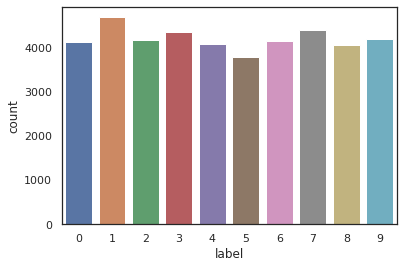

In [7]:
g = sns.countplot(y_train)

In [8]:

X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
X_train =X_train/255.0
y_train = y_train/255.0

In [11]:
X_train.shape

(42000, 784)

In [12]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [13]:
X_train.shape

(42000, 28, 28, 1)

In [14]:
Y_train = to_categorical(y_train, num_classes = 10)

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

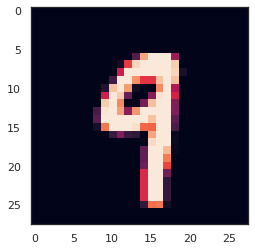

In [16]:
plt.imshow(X_train[2][:,:,0])

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [18]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [19]:
model.compile(optimizer= optimizer ,loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
history = model.fit(X_train,Y_train, batch_size = 86,
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, 
                               callbacks=[learning_rate_reduction])

Epoch 1/30
440/440 - 139s - loss: 0.0051 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 2/30
440/440 - 139s - loss: 3.1537e-12 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 3/30
440/440 - 140s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 4/30
440/440 - 144s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 5/30
440/440 - 139s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 6/30
440/440 - 139s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 7/30
440/440 - 138s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 8/30
440/440 - 144s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 9/30
440/440 - 139s - loss: 0.0000e+00 - accuracy: 0.0984 - val_loss: 0.0000e+00 - val_accuracy: 0.0979
Epoch 10/30
44